# Basic Analysis

## Imports

In [86]:
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

## Prepare the data based on the previous notebook

In [88]:
DATA_DIR = pathlib.Path('../Coding Challenge - Data(20221128)')
fprop = fm.FontProperties(fname = './resources/NotoSansJP-Thin.otf')

stores_df = pd.read_csv(DATA_DIR / 'stores.csv')
transactions_df = pd.read_csv(DATA_DIR / 'transactions.csv')
users_df = pd.read_csv(DATA_DIR / 'users.csv')
dataframe = transactions_df.merge(users_df, left_on='user_id', right_on='id', how='left').merge(
    stores_df, left_on='store_id', right_on='id', how='left').drop(columns=['id_x','id_y','id','user_id','store_id'])

# Drop columns that are not used in this analysis
dataframe = dataframe.drop(columns=['lat','lon'])

# Convert date columns to datetime
dataframe['event_occurrence'] = pd.to_datetime(dataframe['event_occurrence'])
# Convert categorical columns to category
category_columns = ['gender', 'category', 'nam', 'laa']
for column in category_columns:
    dataframe[column] = dataframe[column].astype('category')

# Drop rows with missing values
dataframe = dataframe.dropna()

dataframe.head()

,event_occurrence,amount,gender,age,nam,laa,category
0,2020-01-01 06:40:43.323987,315,M,88.0,Saitama Ken,Soka Shi,コンビニ
1,2020-01-01 07:04:25.968615,1646,M,44.0,Gunma Ken,Meiwa Cho,ショッピング
2,2020-01-01 07:06:16.164563,385,M,16.0,Hiroshima Ken,Fukuyama Shi,コンビニ
3,2020-01-01 07:07:26.029685,166,F,79.0,Tokyo To,Nerima Ku,グルメ
4,2020-01-01 07:12:24.448015,656,F,79.0,Tokyo To,Edogawa Ku,スーパーマーケット


## Raw data visualization

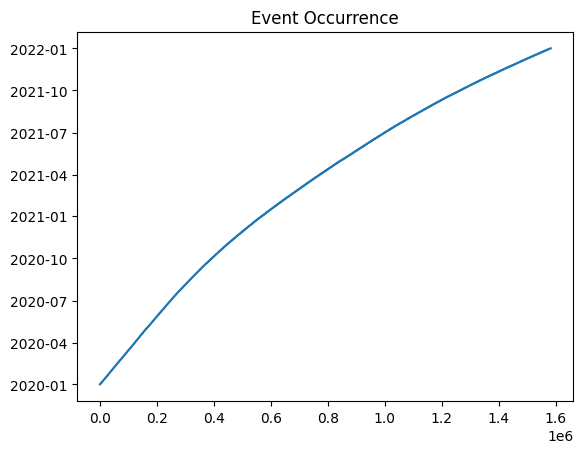

In [40]:
# visualize date-time data
plt.plot(dataframe['event_occurrence'])
plt.title('Event Occurrence')
plt.show()

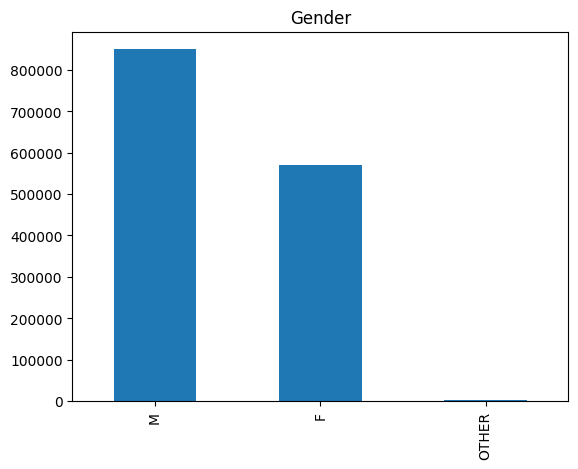

In [41]:
dataframe['gender'].value_counts().plot(kind='bar')
plt.title("Gender")
plt.show()

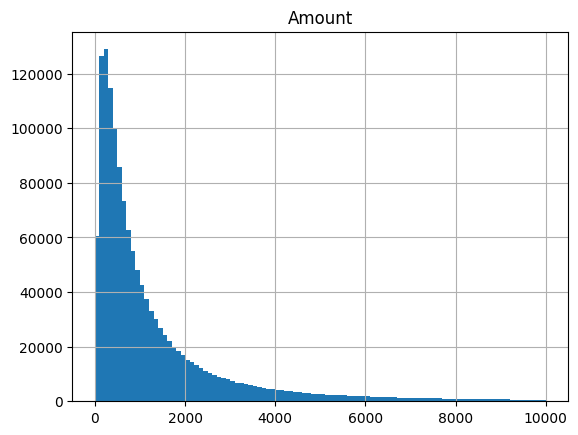

In [78]:
dataframe['amount'].hist(range=(0, 10000), bins=100)
plt.title("Amount < 10000")
plt.show()

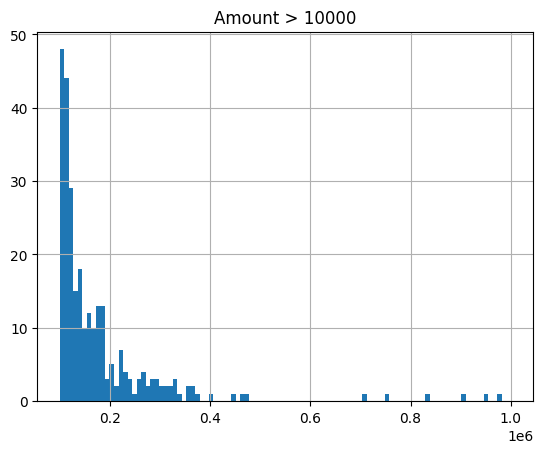

In [85]:
# show outliers
dataframe[dataframe['amount'] > 10000]['amount'].hist(range=(100000, 1000000), bins=100)
plt.title("Amount > 10000")
plt.show()

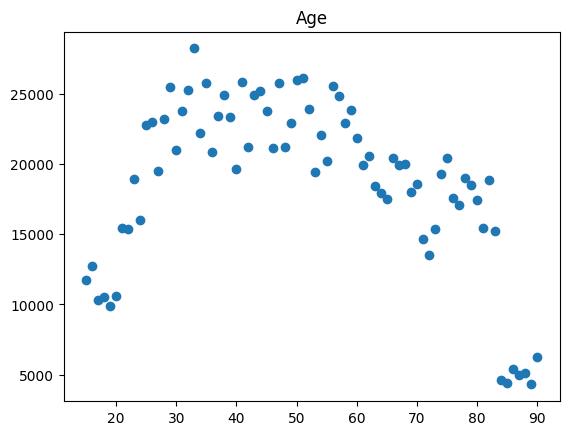

In [52]:
age_counts = dataframe['age'].value_counts()
plt.scatter(age_counts.index, age_counts.values)
plt.title("Age")
plt.show()

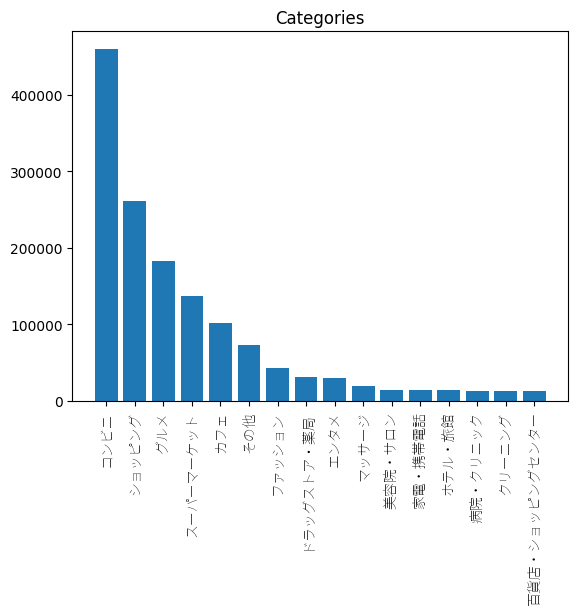

In [42]:
counts = dataframe['category'].value_counts()
plt.bar(counts.index, counts.values)
plt.title('Categories')
plt.xticks(rotation=90, fontproperties=fprop)
plt.show()

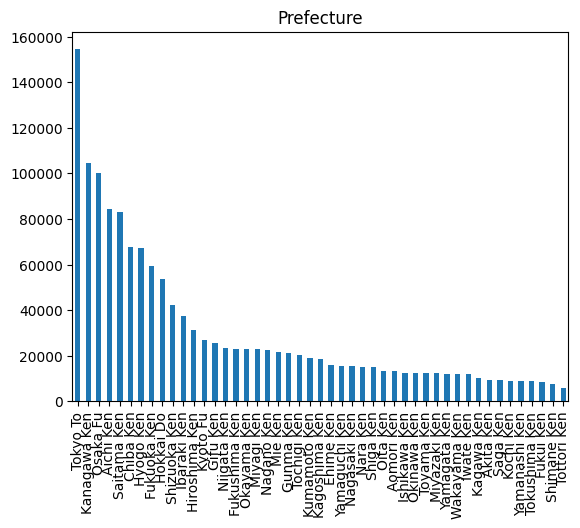

In [89]:
dataframe['nam'].value_counts().plot(kind='bar')
plt.title('Prefectures')
plt.show()


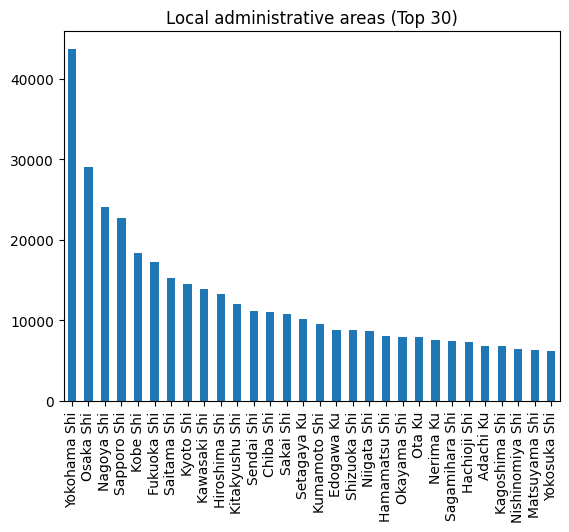

In [91]:
# Plot LAA, only show top 30
dataframe['laa'].value_counts().head(30).plot(kind='bar')
plt.title('Local administrative areas (Top 30)')
plt.show()

It seems that the data is fairly clean and there are no outliers.

         event_occurrence  amount gender   age
880321       1.621076e+09    1990      F  56.0
35098        1.580047e+09     771      F  53.0
975650       1.624357e+09     151      M  51.0
19687        1.579087e+09     644      M  36.0
1360558      1.635602e+09     497      M  78.0


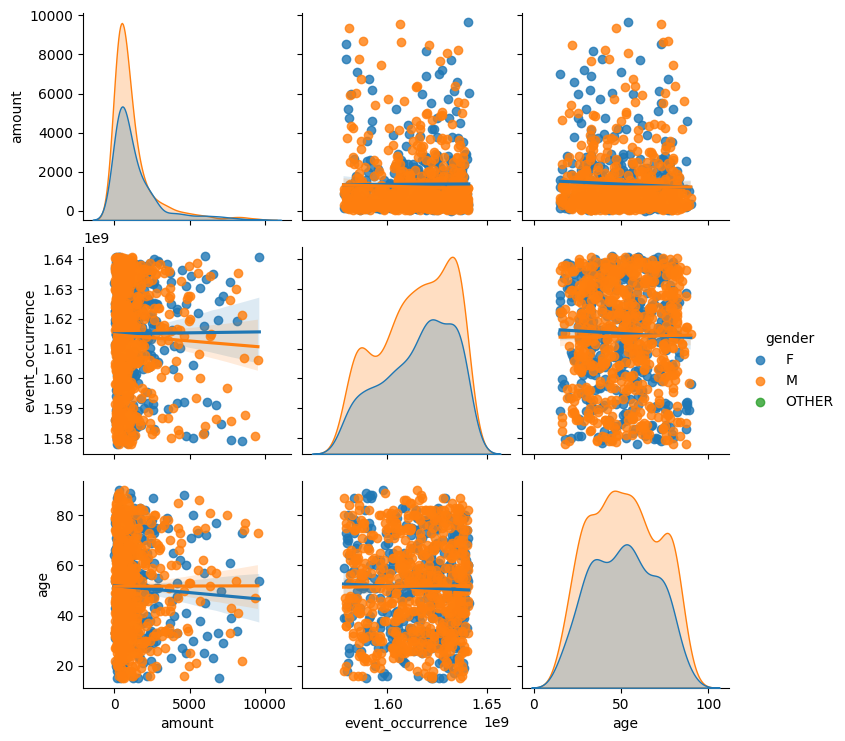

In [121]:
visualization_dataset = dataframe[(dataframe['amount'] < 10000) & (dataframe['gender'] != 'OTHER')].sample(1000)
# Convert datetime to integer
visualization_dataset['event_occurrence'] = visualization_dataset['event_occurrence'].astype('int64') / 10**9
print(visualization_dataset[['event_occurrence', 'amount', 'gender', 'age']].head())
#sns.pairplot(visualization_dataset[['event_occurrence','amount', 'gender', 'age']])
sns.pairplot(visualization_dataset, vars=['amount', 'event_occurrence', 'age'], kind='reg', hue="gender")
